In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA

In [ ]:
# 데이터셋 로드

df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# 정규화

X = df.drop(columns=['Class'])      # Class 열 제외하고 입력 데이터로 사용
y = df['Class']                     # Class 열은 따로 라벨로 저장

scaler = StandardScaler()           # 표준 정규화 도구 생성
X_scaled = scaler.fit_transform(X)  # 평균 0, 표준편차 1 형태로 스케일 조정

In [ ]:
# Isolation Forest

iso_forest = IsolationForest(contamination=0.0017, random_state=42)     # 부정거래 비율 0.17% 지정
iso_preds = iso_forest.fit_predict(X_scaled)                            # 모델 학습 및 예측 (-1: 이상치, 1: 정상)
iso_preds = [1 if p == -1 else 0 for p in iso_preds]                    # # -1이면 1(이상치), 1이면 0(정상)으로 변환

In [ ]:
# DBSCAN

dbscan = DBSCAN(eps=2, min_samples=5)                           # eps=2는 밀집 거리 기준
dbscan_preds = dbscan.fit_predict(X_scaled)                     # -1: 이상치, 그 외: 정상(클러스터 번호)
dbscan_preds = [1 if p == -1 else 0 for p in dbscan_preds]      # -1: 이상치 1로 변경

In [ ]:
# 성능 평가

print("=== Isolation Forest ===")
print(confusion_matrix(y, iso_preds))           # 실제 vs 예측 정리 표 출력
print(classification_report(y, iso_preds))      # 정밀도, 재현율, F1-score 등 평가 지표 출력

print("=== DBSCAN ===")
print(confusion_matrix(y, dbscan_preds))
print(classification_report(y, dbscan_preds))

# [[정상거래로 잘 맞춘 개수, 정상거래인데 부정으로 잘못 예측한 개수],
# [부정거래인데 정상으로 잘못 예측한 개수, 부정거래로 잘 맞춘 개수]]

=== Isolation Forest ===
[[283955    360]
 [   367    125]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.26      0.25      0.26       492

    accuracy                           1.00    284807
   macro avg       0.63      0.63      0.63    284807
weighted avg       1.00      1.00      1.00    284807

=== DBSCAN ===
[[230399  53916]
 [    71    421]]
              precision    recall  f1-score   support

           0       1.00      0.81      0.90    284315
           1       0.01      0.86      0.02       492

    accuracy                           0.81    284807
   macro avg       0.50      0.83      0.46    284807
weighted avg       1.00      0.81      0.89    284807



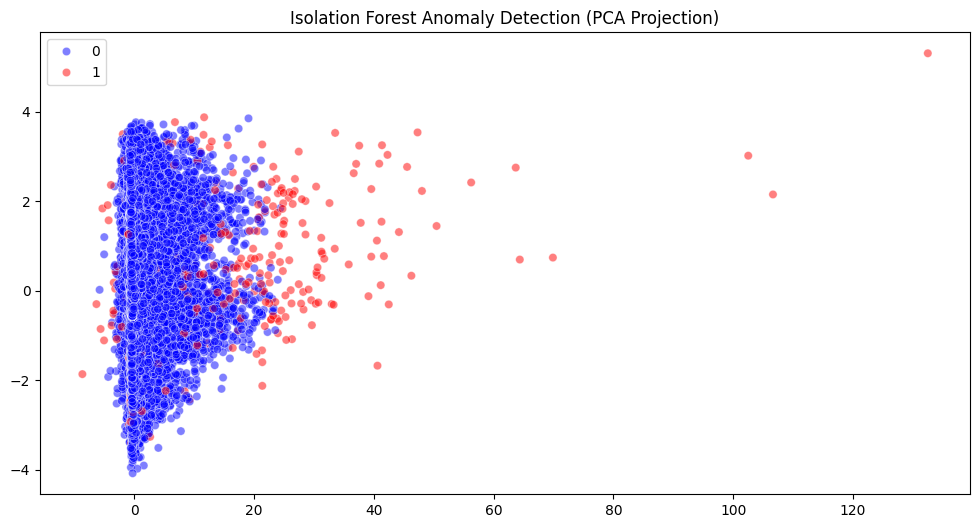

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)     # 고차원 2D 좌표 변환

plt.figure(figsize=(12,6))
# 데이터 산점도 (파랑: 정상, 빨강: 이상치)
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=iso_preds, palette={0:'blue', 1:'red'}, alpha=0.5)
plt.title('Isolation Forest Anomaly Detection (PCA Projection)')
plt.show()